In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

### Linking MMETSP and SRR number 
- Enable cross comparison of the NCGR to Trinity assemblies

In [2]:
sra_run = pd.read_csv('../SraRunInfo_719.csv')
sra_map = sra_run[['Run', 'SampleName']]


In [4]:
# reference-based transrate evaluation
file_combined_v_SRA = "../assembly_evaluation_data/combined_transrate_reference.csv"
file_SRA_v_combined = "../assembly_evaluation_data/combined_transrate_reverse.csv"

In [5]:
# Load in df and add the mmetsp/sra information
SRA_v_combined = pd.read_csv(file_combined_v_SRA,index_col="Run")
combined_v_SRA = pd.read_csv(file_SRA_v_combined,index_col="Run")

In [6]:
SRA_v_combined.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName
Run,,,,,,,,,,,,,,,,,,,,,
SRR1294454,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/MMETSP0...,31873,201,6324,23666494,742.52483,0,8258,0,14350,...,0.78303,24440,0.77288,23764,0.75150,0.77729,NaN,NaN,NaN,MMETSP0717
SRR1294455,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/MMETSP0...,31873,201,6324,23666494,742.52483,0,8258,0,14350,...,0.37906,4773,0.36639,4542,0.34866,0.44061,NaN,NaN,NaN,MMETSP0717
SRR1294456,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/MMETSP0...,31873,201,6324,23666494,742.52483,0,8258,0,14350,...,0.37713,4794,0.36621,4622,0.35307,0.43813,NaN,NaN,NaN,MMETSP0717
SRR1294457,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/MMETSP0...,31873,201,6324,23666494,742.52483,0,8258,0,14350,...,0.38515,4838,0.37178,4647,0.35710,0.44670,NaN,NaN,NaN,MMETSP0717
SRR1294445,/mnt/scratch/ljcohen/mmetsp/MMETSP0088/MMETSP0...,28938,201,4376,17144795,592.46648,0,4589,0,10473,...,0.77161,21825,0.75905,21144,0.73537,0.76352,NaN,NaN,NaN,MMETSP0088


In [7]:
combined_v_SRA.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName
Run,,,,,,,,,,,,,,,,,,,,,
SRR1294454,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,31622,201,6324,23325198,737.62564,0,8078,0,14292,...,0.76839,24081,0.75553,22959,0.72033,0.76829,NaN,NaN,NaN,MMETSP0717
SRR1294455,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,13027,201,4914,6847068,525.60590,0,1027,0,4519,...,0.03238,684,0.02146,384,0.01205,0.13538,NaN,NaN,NaN,MMETSP0717
SRR1294456,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,13091,201,4823,6877775,525.38194,0,1028,0,4558,...,0.03109,657,0.02061,368,0.01155,0.13541,NaN,NaN,NaN,MMETSP0717
SRR1294457,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,13013,201,4849,6830760,524.91816,0,1000,0,4539,...,0.03288,681,0.02137,378,0.01186,0.13683,NaN,NaN,NaN,MMETSP0717
SRR1294445,/mnt/scratch/ljcohen/mmetsp/MMETSP0088/Chaetoc...,28753,201,4099,16978158,590.48301,0,4487,0,10441,...,0.76083,21578,0.74566,20492,0.70813,0.76015,NaN,NaN,NaN,MMETSP0088


In [8]:
SRA_v_combined = SRA_v_combined.drop_duplicates()
combined_v_SRA = combined_v_SRA.drop_duplicates()

### Plotting functions 


In [11]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < than df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'combined', df2name = 'SRA', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax


## Checking out different variables reported by transrate

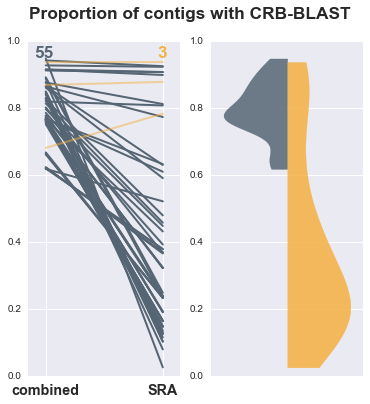

In [12]:
p_refs_with_CRBB, fig, ax = create_plots(SRA_v_combined, combined_v_SRA, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

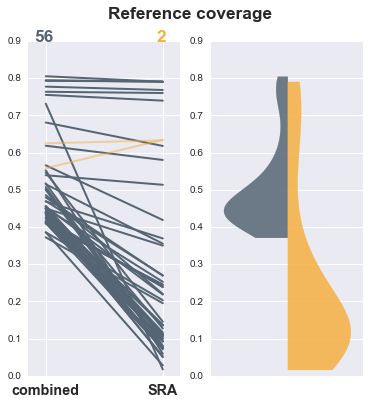

In [29]:
reference_coverage, fig, ax = create_plots(SRA_v_combined, combined_v_SRA, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.9, ypos = 0.9)

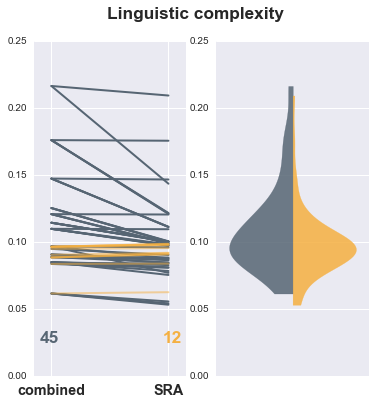

In [25]:
linguistic_complexity, fig, ax = create_plots(SRA_v_combined, combined_v_SRA, 'linguistic_complexity', 'Linguistic complexity', ymax=0.25, ypos=0.025)

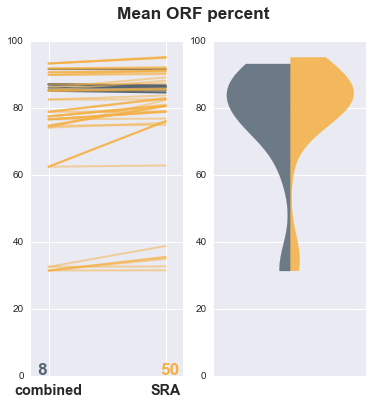

In [19]:
mean_orf_percent, fig, ax = create_plots(SRA_v_combined, combined_v_SRA, 'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)

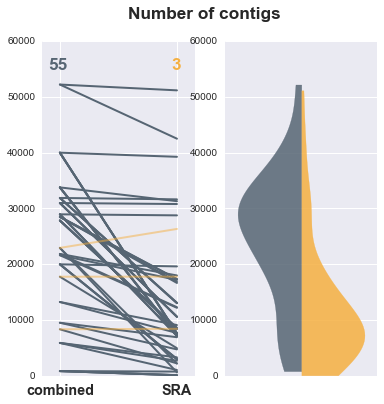

In [31]:
n_seqs, fig, ax = create_plots(SRA_v_combined, combined_v_SRA, 'n_seqs', 'Number of contigs',ymax=60000, ypos=55000)